In [1]:
path=r"D:\Asus\Documents\timeseries_rev (1).csv"

In [2]:
import pandas as pd
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential



In [3]:
import pandas as pd

In [4]:
file= pd.read_csv(path)

In [5]:
file.head(10)

,Unnamed: 0,week,year,date,total_revenue
0,96,49,2009,2009-12-01,232177.510
1,99,50,2009,2009-12-07,207908.730
2,101,51,2009,2009-12-14,207685.870
3,103,52,2009,2009-12-21,35731.900
4,0,1,2010,2010-01-04,167636.950
5,2,2,2010,2010-01-11,125493.610
6,4,3,2010,2010-01-18,119473.351
7,6,4,2010,2010-01-25,143198.761
8,8,5,2010,2010-02-01,112299.692
9,10,6,2010,2010-02-08,80059.660


In [6]:
file.describe()

,Unnamed: 0,week,year,total_revenue
count,104.000000,104.000000,104.000000,104.000000
mean,51.500000,26.471154,2010.432692,167065.425654
std,30.166206,15.034560,0.570546,62661.386497
min,0.000000,1.000000,2009.000000,35731.900000
25%,25.750000,13.750000,2010.000000,124140.957500
50%,51.500000,26.500000,2010.000000,150624.091000
75%,77.250000,39.250000,2011.000000,201107.020000
max,103.000000,52.000000,2011.000000,408044.970000


In [7]:
file.shape

(104, 5)

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   week           104 non-null    int64  
 2   year           104 non-null    int64  
 3   date           104 non-null    object 
 4   total_revenue  104 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


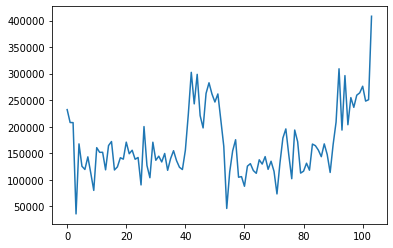

In [9]:
import matplotlib.pyplot as plt
plt.plot(file['total_revenue'].values)

In [142]:
input= []
output=[]

In [143]:
file1= file['total_revenue'].values

In [144]:
type(file1)

numpy.ndarray

In [145]:
file2=file1.tolist()

In [146]:
len(file2)

104

In [147]:
type(np.mean(file2))

numpy.float64

In [148]:
np.std(file2)

62359.40215426441

In [149]:
file2= (file2-np.min(file2))/(np.max(file2)-np.min(file2))

In [150]:
file2

array([0.52763555, 0.46245175, 0.46185317, 0.        , 0.35428531,
       0.24109202, 0.22492214, 0.28864649, 0.20565432, 0.11906045,
       0.33513328, 0.31146181, 0.31178615, 0.22307355, 0.34575168,
       0.36617511, 0.22231484, 0.23792573, 0.28418954, 0.27716115,
       0.36305159, 0.3045043 , 0.32215264, 0.27651371, 0.28551608,
       0.14672104, 0.44185344, 0.24510418, 0.18316021, 0.36276371,
       0.27139316, 0.29212963, 0.26290804, 0.30571873, 0.22060593,
       0.27963072, 0.31977123, 0.2700621 , 0.23605846, 0.22454769,
       0.32243569, 0.5045623 , 0.71622723, 0.55672378, 0.70607819,
       0.4972986 , 0.43508961, 0.60934192, 0.66335517, 0.60668878,
       0.56608566, 0.60687496, 0.47510347, 0.34214276, 0.02773905,
       0.21193159, 0.3185839 , 0.37527646, 0.18567465, 0.18861522,
       0.13992536, 0.24164677, 0.2542185 , 0.2193179 , 0.20537025,
       0.27379624, 0.25201592, 0.28987884, 0.2255248 , 0.26643953,
       0.21551083, 0.10110351, 0.25613449, 0.38366212, 0.42997

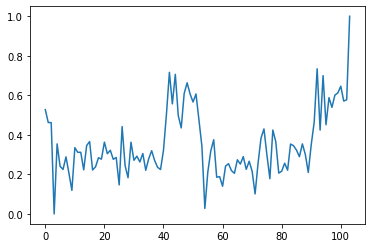

In [151]:
plt.plot(file2)

In [152]:
n_steps= 10

for i in range(0,len(file2)):
    next= i+n_steps
    if next >= len(file2):
        break
    xx= (file2)[i:next]
    input.append(xx)
    print(next)
    output.append(file2[next])

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


In [153]:
xx

array([0.42416596, 0.69963254, 0.45117151, 0.58833194, 0.53912945,
       0.60068297, 0.61234872, 0.64592167, 0.57076342, 0.57774265])

In [154]:
file2[-4:-1]

array([0.64592167, 0.57076342, 0.57774265])

In [155]:
input

[array([0.52763555, 0.46245175, 0.46185317, 0.        , 0.35428531,
        0.24109202, 0.22492214, 0.28864649, 0.20565432, 0.11906045]),
 array([0.46245175, 0.46185317, 0.        , 0.35428531, 0.24109202,
        0.22492214, 0.28864649, 0.20565432, 0.11906045, 0.33513328]),
 array([0.46185317, 0.        , 0.35428531, 0.24109202, 0.22492214,
        0.28864649, 0.20565432, 0.11906045, 0.33513328, 0.31146181]),
 array([0.        , 0.35428531, 0.24109202, 0.22492214, 0.28864649,
        0.20565432, 0.11906045, 0.33513328, 0.31146181, 0.31178615]),
 array([0.35428531, 0.24109202, 0.22492214, 0.28864649, 0.20565432,
        0.11906045, 0.33513328, 0.31146181, 0.31178615, 0.22307355]),
 array([0.24109202, 0.22492214, 0.28864649, 0.20565432, 0.11906045,
        0.33513328, 0.31146181, 0.31178615, 0.22307355, 0.34575168]),
 array([0.22492214, 0.28864649, 0.20565432, 0.11906045, 0.33513328,
        0.31146181, 0.31178615, 0.22307355, 0.34575168, 0.36617511]),
 array([0.28864649, 0.20565432, 0.

In [156]:
output

[0.3351332844694415,
 0.31146180820351255,
 0.31178615351859945,
 0.2230735547371432,
 0.3457516841941653,
 0.36617511171445216,
 0.2223148384234793,
 0.23792573277107693,
 0.2841895424192316,
 0.27716115364953375,
 0.36305158720321024,
 0.3045042979554814,
 0.3221526442786489,
 0.27651371465417046,
 0.28551608462200545,
 0.1467210377545933,
 0.4418534380219376,
 0.24510418073692186,
 0.18316020976647027,
 0.3627637085101543,
 0.271393158451298,
 0.2921296316564951,
 0.26290804134272927,
 0.30571873289325635,
 0.22060592715694402,
 0.27963071508609355,
 0.3197712344613639,
 0.270062101231093,
 0.23605846015558707,
 0.22454769046920142,
 0.3224356883307894,
 0.5045623029027768,
 0.7162272331723668,
 0.5567237808761438,
 0.7060781938168518,
 0.4972986041021995,
 0.4350896142324575,
 0.6093419175426958,
 0.6633551731074279,
 0.606688776733002,
 0.5660856601139679,
 0.6068749614404025,
 0.47510346601585285,
 0.3421427563636181,
 0.02773904767834226,
 0.2119315875749361,
 0.3185839003718023

In [157]:
import numpy as np

In [158]:
input_array=np.asarray(input)

In [159]:
input_array.shape

(94, 10)

In [160]:
output_array= np.asarray(output)
output_array=output_array.reshape([output_array.shape[0],1])

In [161]:
output_array[:4]

array([[0.33513328],
       [0.31146181],
       [0.31178615],
       [0.22307355]])

In [162]:
# input_array=input_array.reshape([input_array.shape[0],1])
# input_array.shape

In [163]:
output_array.shape

(94, 1)

In [164]:
reshaped_input=input_array.reshape([input_array.shape[0],input_array.shape[1],1])

In [165]:
reshaped_input.shape

(94, 10, 1)

In [205]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(np.array(input), np.array(output), epochs=200, verbose=1)

Epoch 1/200
3/3 [==============================] - 6s 22ms/step - loss: 0.1590
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1413
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.1264
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 0.1124
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0984
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0820
Epoch 7/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0650
Epoch 8/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0477
Epoch 9/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0301
Epoch 10/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0219
Epoch 11/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0282
Epoch 12/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0298
Epoch 13/200
3/3 [==============================]

In [206]:
output[-4:-1]

[0.6459216701686074, 0.5707634169275912, 0.5777426508287804]

In [207]:
output[-11:]

[0.4241659606524111,
 0.699632543117549,
 0.45117151004126693,
 0.5883319379574851,
 0.5391294482355947,
 0.6006829682342334,
 0.6123487150209384,
 0.6459216701686074,
 0.5707634169275912,
 0.5777426508287804,
 1.0]

In [208]:
# demonstrate prediction for next 10 days
x_input = output[-10:]
temp_input=list(x_input)
lst_output=[]
i=0
n_features=1
while(i<50):
    
    
    if(len(temp_input)>10):
        x_input=np.array(np.asarray(temp_input[1:]))
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = np.asarray(x_input).reshape((1, 10, n_features))
        #print(x_input)
        yhat = model.predict(np.asarray(x_input).astype('float32'), verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = np.asarray(x_input).reshape((1, 10, n_features))
        yhat = model.predict(np.asarray(x_input).astype('float32'), verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


[0.65239793]
1 day input [0.45117151 0.58833194 0.53912945 0.60068297 0.61234872 0.64592167
 0.57076342 0.57774265 1.         0.65239793]
1 day output [[0.7341612]]
2 day input [0.58833194 0.53912945 0.60068297 0.61234872 0.64592167 0.57076342
 0.57774265 1.         0.65239793 0.7341612 ]
2 day output [[0.71121454]]
3 day input [0.53912945 0.60068297 0.61234872 0.64592167 0.57076342 0.57774265
 1.         0.65239793 0.7341612  0.71121454]
3 day output [[0.70910025]]
4 day input [0.60068297 0.61234872 0.64592167 0.57076342 0.57774265 1.
 0.65239793 0.7341612  0.71121454 0.70910025]
4 day output [[0.65376556]]
5 day input [0.61234872 0.64592167 0.57076342 0.57774265 1.         0.65239793
 0.7341612  0.71121454 0.70910025 0.65376556]
5 day output [[0.5872312]]
6 day input [0.64592167 0.57076342 0.57774265 1.         0.65239793 0.7341612
 0.71121454 0.70910025 0.65376556 0.58723122]
6 day output [[0.47899088]]
7 day input [0.57076342 0.57774265 1.         0.65239793 0.7341612  0.71121454
 

In [209]:
print(lst_output)

[0.65239793, 0.7341612, 0.71121454, 0.70910025, 0.65376556, 0.5872312, 0.47899088, 0.37431937, 0.18984237, -0.0031643026, 0.09807044, 0.048398376, 0.06435192, 0.0848268, 0.10814116, 0.12357966, 0.13705681, 0.14775029, 0.15841708, 0.16884357, 0.18046719, 0.19135505, 0.20256156, 0.21327475, 0.2236006, 0.2337766, 0.24391425, 0.2540567, 0.26421663, 0.2743412, 0.28431475, 0.2942853, 0.30428478, 0.31433725, 0.32441893, 0.3345368, 0.34470493, 0.35485715, 0.3648712, 0.3748426, 0.3848252, 0.3947037, 0.40457013, 0.41433695, 0.4239686, 0.43351328, 0.44285372, 0.4520029, 0.46089637, 0.46948472]


In [210]:
type(lst_output)

list

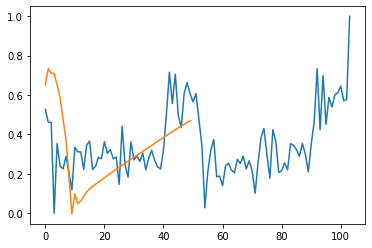

In [211]:
plt.plot(file2)
plt.plot(lst_output)

In [212]:
# plt.plot(lst_output*(np.max(file1-np.min(file1))))

In [213]:
np.min(file1)

35731.90000000003

In [214]:

jj=[np.multiply(x,(np.max(file1)-np.min(file1))) for x in lst_output]

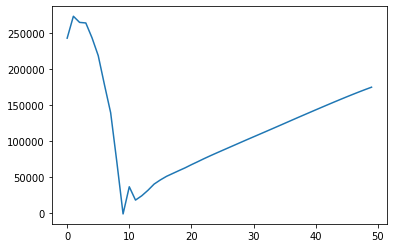

In [215]:
plt.plot(jj)

In [216]:
kk=[np.add(x,(np.min(file1))) for x in jj]

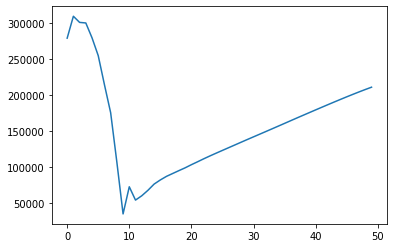

In [217]:
plt.plot(kk)

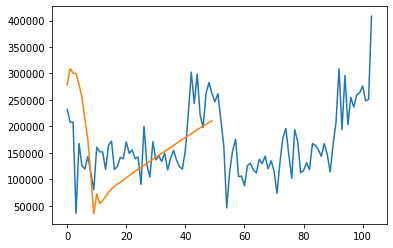

In [218]:
plt.plot(file1)
plt.plot(kk)

In [219]:
ff=file1.tolist()

In [220]:
kkkk=[ff.append(x) for x in kk]

In [221]:
kkkk[-10:]

[None, None, None, None, None, None, None, None, None, None]

In [222]:
[x for x in kk]

[278628.17641156155,
 309069.70955408056,
 300526.36970546265,
 299739.1896859028,
 279137.3624047055,
 254365.75787679869,
 214066.4660158901,
 175095.89550340126,
 106412.69675712325,
 34553.78880033135,
 72244.80758916325,
 53751.24776957635,
 59690.95952293997,
 67314.02530127321,
 75994.26783195493,
 81742.22207096874,
 86759.94267990431,
 90741.263411021,
 94712.64785848415,
 98594.56691778608,
 102922.19293194957,
 106975.88598035285,
 111148.21525971481,
 115136.87585865596,
 118981.32442114272,
 122769.98333068707,
 126544.36195317158,
 130320.52699851283,
 134103.20527501503,
 137872.7128438715,
 141585.99802381406,
 145298.16252854833,
 149021.10104939382,
 152763.7678922225,
 156517.30861330967,
 160284.31962848437,
 164070.0492483754,
 167849.853714195,
 171578.21807837556,
 175290.70436113994,
 179007.3515667073,
 182685.24116333915,
 186358.6480591379,
 189994.96171512228,
 193580.95594467592,
 197134.56155113113,
 200612.12768033607,
 204018.4920985363,
 207329.64350721

In [223]:
type(ff)

list